To review:
My target variable here is 'staar all subjects meet'. This is the minumum Texas state required score for a student to pass without intervention. This is a regression problem with a continues dependent variable. I'll be using the following models in this notebook:
-Basic Linear Regression
-Random Forest Regressor
-Gradient Boosting Regressor
The business application is to use this model to evaluate district performance as well as adjust features to maximize student outcomes. During EDA (which can be reviewed here: https://github.com/jonarms/Capstone2/blob/1b4a4190f26c55d2c365db97ea881f61296a8cde/Capstone%202%20EDA.ipynb) I found that the following features most closely correlate to the target variable: (Note that a * notation indicates that this feature was generated based on aggregate statistics and not included in the original dataset, while a ** indicates that I believe this feature to be actionable. All other features are for predictive purposes only)

Students % Hispanic

Students % White

Students % Asian

Students % Economically Disadvantaged

Students % Gifted and Talented Education

Attendance Rate (2017-18)**

Annual Dropout Rate Gr. 9-12 (2017-18)**

Staff % Teachers**

Staff % Minority

Teacher % With 5 or Fewer Years of Experience**

Teacher Turnover Rate**

Operating Revenue % Federal

Expenditures % Basic Education Services

Expenditures % State Compensatory Education

Racial Dif Stu/Tea'* (This was compiled based on taking the average differnce between the reported ratial makeup of the staff vs that of the students. See the link above for more complete documentation)

In [1]:
#pip install statsmodels

In [2]:
#imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9806-1F72

 Directory of C:\Users\Armstrongs\Desktop\GitHub\Capstone2

11/17/2021  06:22 PM    <DIR>          .
11/17/2021  06:22 PM    <DIR>          ..
11/17/2021  02:15 PM    <DIR>          .ipynb_checkpoints
11/11/2021  12:29 PM           626,079 Capstone 2 Data Wrangling.ipynb
11/17/2021  03:50 PM         3,232,777 Capstone 2 EDA.ipynb
11/16/2021  10:16 PM            97,277 Capstone 2 Modeling.ipynb
09/13/2021  10:59 AM           750,317 district_summary.csv
11/17/2021  06:22 PM           149,726 modeling2.ipynb
11/17/2021  02:15 PM            97,277 modeling3.ipynb
11/16/2021  06:21 PM           125,511 Preprocessing and Training Data.ipynb
09/13/2021  11:00 AM           601,934 privateSchoolData - allSchoolData.csv
11/11/2021  01:47 PM           362,344 scaledsnap.csv
10/13/2021  02:45 PM           104,931 snapshot_sig_features.csv
11/17/2021  03:02 PM               689 staar_meets_2019.csv
11/17/2021  03:02 PM           

In [4]:
#After meeting with my mentor I've learned that I should split my data before scaling. Fortunately I had an unscaled version 
#of my data handy
df = pd.read_csv('unscaledsnap.csv')
df.head()

,Unnamed: 0,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0,6.7,84.8,0.5,42.6,8.5,96.5,0.0,51.0,14.1,...,0,0,0,0,0,0,0,0,0,1
1,1,11.3,78.1,0.3,58.1,3.6,96.4,0.0,57.2,10.5,...,0,0,0,0,0,0,1,0,0,0
2,2,8.2,78.2,1.0,53.7,8.8,95.4,0.4,49.7,13.3,...,0,0,0,0,0,0,0,0,0,1
3,3,13.9,73.2,0.0,47.8,6.0,95.9,0.9,52.4,12.5,...,1,0,0,0,0,0,0,0,0,1
4,4,41.2,27.5,0.9,74.9,2.9,95.3,0.0,51.7,28.5,...,0,0,1,0,0,0,0,0,0,0


In [5]:
y = df['target']
X = df.drop(columns=['target', 'Unnamed: 0'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [6]:
#Scaling to my training data
names = df.drop(columns=['target', 'Unnamed: 0']).columns
# Making a Scaler object
scaler = StandardScaler()
# Fitting data to the scaler object
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=names) 
X_train.head()

,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.668946,-0.783035,0.560796,-0.580512,0.370439,-0.026778,0.423767,-0.330386,0.834209,-0.545040,...,-0.626224,-0.317451,-0.254951,-0.284988,13.015376,-0.162807,-0.433918,-0.184338,-0.424329,-0.810918
1,-1.059285,0.499916,3.573114,-2.896159,-1.651433,0.998590,-0.426306,2.017195,-0.377069,-0.203900,...,-0.626224,3.150092,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,-0.810918
2,-0.510405,0.729809,-0.352776,-0.555451,0.254904,0.806334,-0.426306,-0.141319,-0.571668,-0.811130,...,-0.626224,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171
3,1.937304,-1.543165,-0.278703,0.346749,-1.651433,-7.652950,4.624123,-0.519453,2.109029,1.658729,...,1.596872,3.150092,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,-0.810918
4,-0.035698,0.303395,-0.352776,0.236480,-0.091703,0.165479,0.473771,2.095973,-1.099864,-1.165917,...,1.596872,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171


In [7]:
#Transforming testing data on scaler fit
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=names) 
X_test.head()


,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.954512,-0.779327,-0.254011,0.527189,0.168252,-0.475376,-0.276293,1.308194,0.115385,0.403331,...,-0.626224,-0.317451,3.922323,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,-0.810918
1,0.431592,-0.186055,-0.229320,2.005795,2.334544,0.421821,-0.426306,-1.669610,0.349698,-1.432006,...,1.596872,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171
2,1.062062,-0.716292,-0.352776,0.757752,1.208072,0.421821,-0.426306,0.047748,0.508554,0.028076,...,1.596872,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171
3,-0.536366,0.740933,-0.352776,0.411908,0.688162,0.357735,-0.426306,0.804015,-0.849666,-0.101557,...,-0.626224,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171
4,-1.207631,1.486231,-0.352776,1.549683,-1.391478,-0.731718,-0.426306,2.395329,-1.238863,0.382862,...,1.596872,-0.317451,-0.254951,-0.284988,-0.076832,-0.162807,-0.433918,-0.184338,-0.424329,1.233171


In [8]:
#I'll start by using the Linear Regressor model out of the box to get a baseline
rModel = linear_model.LinearRegression()
rModel.fit(X_train[['11. Students % Economically Disadvantaged:']], y_train)
print(rModel.score(X_train[['11. Students % Economically Disadvantaged:']], y_train))

0.558428941123186


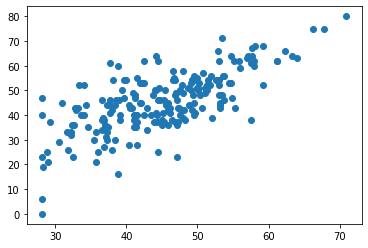

In [9]:
y_pred = rModel.predict(X_test[['11. Students % Economically Disadvantaged:']])
plt.scatter(x = y_pred, y = y_test)

Out of the box the linear regression model predicts around 56% of the variation away from the mean in the training data using just percent of student economically disadvantaged, which was the strongest predicting variable. This will be the baseline that I'll use to judge the rest of my modeling. I can see based on plotting the predictions against the test data that the model seems to have the least variation at the upper end of the spectrum. That is to say it can more accurately predict when a district will do well than will a district will perform poorly, although the highest error seems to be right in the middle ranges. 

The next model I'll use will be a Random Forest Regressor. I'll use random search training to find the best hyperparameters for a gridsearch, and then use that gridsearch to find the best hyperparameters for the model. From there I'll fit the model to the training data and compare it's performance to the linear regressor. Much of the code here has been adapted from and inspired by https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74, one of the required readings for the Springboard Data Science program. 

In [10]:
# Use the random grid to search for best hyperparameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [11]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [12]:
#Now I'll use the RandomForestRegressor with the above hyperparameters and see what kind of performance I get. 
rfmodel = RandomForestRegressor(n_estimators = 1800, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', 
                               max_depth = 80, bootstrap = True)

In [13]:
rfmodel.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=2, n_estimators=1800)

In [14]:
print(rfmodel.score(X_train, y_train))

0.9418381792035575


It's clear that the tuned Random Forest Regressor out performs the Linear Regressor by a wide margin, at least at predicting the variation from the mean of the testing data. I'll take a look now at the graphed predictions vs test data to see how it performed. 

In [15]:
rf_y_pred = rfmodel.predict(X_test)

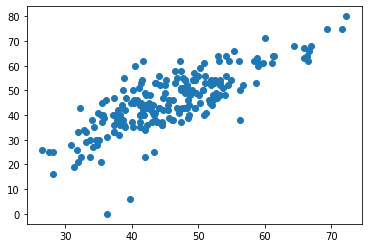

In [16]:
plt.scatter(x = rf_y_pred, y = y_test)

In [17]:
def checkrmse(predict, testval):

    difference_array = np.subtract(predict, testval)
    squared_array = np.square(difference_array)
    mse = squared_array.mean()

    return(np.sqrt(mse))
#This code adapted from the Linear Regression Case Study (https://github.com/jonarms/Regression_CaseStudy/blob/ce7458d2402738c364879dc83215e3111f8e5e37/Springboard%20Regression%20Case%20Study%20-%20the%20Red%20Wine%20Dataset%20-%20Tier%203.ipynb)

In [18]:
predvals = pd.DataFrame(y_test)
predvals['predictions'] = rf_y_pred
predvals.head()

,target,predictions
31,37.0,35.474847
832,40.0,41.805634
413,50.0,40.224632
1047,53.0,41.340920
874,32.0,38.140468


In [19]:
rfrmse = checkrmse(predvals["target"], predvals["predictions"])
rfrmse

7.416592496153762

In [20]:
#The Random Forest Model is off by an average of 7.4%

In [21]:
linpredvals = pd.DataFrame(y_test)
linpredvals['predictions'] = y_pred
linpredvals.head()

,target,predictions
31,37.0,41.503462
832,40.0,28.134906
413,50.0,39.418874
1047,53.0,42.545756
874,32.0,32.258765


In [22]:
lrrmse = checkrmse(linpredvals["target"], linpredvals["predictions"])
lrrmse

8.517868674878908

In [23]:
#The Linear Regression Model is off by an average of 8.5%

In this case the random forest model outperformed the baseline by a little over 1%. Getting better. Next I'll try GradientBoosting

In [24]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]}

In [25]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 0.7081784590147577

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.1}


In [26]:
#So the best score for the GBR is .711. I'll predict using this model and see how it compares using RMSE. 
#Note: I used Gridsearch here instead of randomsearch to see if there was a noticable time difference. There was. 
GBRmodel = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 500, subsample = 0.2)

In [27]:
GBRmodel.fit(X_train, y_train)
GBR_y_pred = GBRmodel.predict(X_test)

In [28]:
GBRpredvals = pd.DataFrame(y_test)
GBRpredvals['predictions'] = GBR_y_pred
GBRpredvals.head()

,target,predictions
31,37.0,37.014566
832,40.0,49.655909
413,50.0,39.696866
1047,53.0,41.812453
874,32.0,33.681978


In [29]:
gbrrmse = checkrmse(GBRpredvals["target"], GBRpredvals["predictions"])
gbrrmse

7.262642897137563

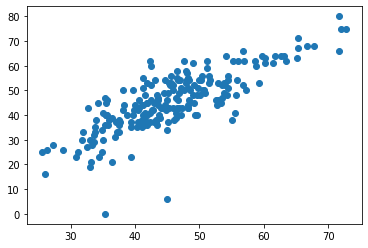

In [30]:
plt.scatter(x = GBR_y_pred, y = y_test)

So far it seems like gradientboosting is the clear winner. However in my initial experimentation I acidentally applied the linear regression model to all of my features instead of just one. This produced an rmse of under 7. I've since corrected this error, but it makes me suspect that multiple linear regression is going to give me the best accuracy. I'm going to try OLS first and then multiple linear regression to see how it does. 

In [31]:
#Note to self, try using the unscaled data to see if that has any effect on performance

In [32]:
X = df[['11. Students % Economically Disadvantaged:']]
X = sm.add_constant(X)
y = df[['target']]
olsX_train, olsX_test, olsy_train, olsy_test = train_test_split(X, y, test_size=0.25, random_state = 12)

In [33]:
olsmodel = sm.OLS(olsy_train, olsX_train)
olsmodel_results = olsmodel.fit()
olsmodel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1006.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):          2.16e-143
Time:                        18:27:20   Log-Likelihood:                -2796.9
No. Observations:                 798   AIC:                             5598.
Df Residuals:                     796   BIC:                             5607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         73.4507      0.910     80.757      0.000      71.665      75.236
11. Students % Economically Disadvantaged:    -0.4526      0.014    -31.720      0.000      -0.481      -0.425
==============================================================================
Omnibus:                       37.261   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.863
Skew:                           0.062   Prob(JB):                     3.10e-25
Kurtosis:                       4.838   Cond. No.                         203.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
OLS_y_pred = olsmodel_results.predict(olsX_test)
OLSpredvals = pd.DataFrame(y_test)
OLSpredvals['predictions'] = OLS_y_pred
olsrmse = checkrmse(OLSpredvals["target"], OLSpredvals["predictions"])
olsrmse

7.952278420133008

In [35]:
print("the ols error is " + str(round(olsrmse, 2)))
print("the linear reg error is " + str(round(lrrmse, 2)))
print("the random forest error is " + str(round(rfrmse, 2)))
print("the gradient boosting error is " + str(round(gbrrmse, 2)))

the ols error is 7.95
the linear reg error is 8.52
the random forest error is 7.42
the gradient boosting error is 7.26


At this point it seems like my best bet is the gradient boosting method, but I still haven't forgotten about my initial good luck with linear regression. I'll try multiple linear regression to see how it performes. Afterward I'll pick the best performing model and make predictions on the target variable of the two districts I'm focusing on based on their most recently published information. 

In [36]:
mlrX, mlry = df.drop(columns = ['target', 'Unnamed: 0']), df[['target']]
mlrX = sm.add_constant(X)
mlrX_train, mlrX_test, mlry_train, mlry_test = train_test_split(mlrX, mlry, test_size=0.2, random_state = 42)
mlrmodel = sm.OLS(mlry_train, mlrX_train)
mlrmodel = mlrmodel.fit()

In [37]:
mlr_y_pred = mlrmodel.predict(mlrX_test)
mlrpredvals = pd.DataFrame(mlry_test)
mlrpredvals['predictions'] = OLS_y_pred
mlrrmse = checkrmse(mlrpredvals["target"], mlrpredvals["predictions"])
mlrrmse

7.952278420133008

In [38]:
#I'll start by using the Linear Regressor model out of the box to get a baseline
rModel2 = linear_model.LinearRegression()
rModel2.fit(X_train, y_train)
y_pred2 = rModel2.predict(X_test)
mlinpredvals = pd.DataFrame(y_test)
mlinpredvals['predictions'] = y_pred2
mlrrmse = checkrmse(linpredvals["target"], linpredvals["predictions"])
mlrrmse

8.517868674878908

Well, initially when I made the mistake I ended up with an rmse of less than 7, but in fixing that mistake I haven't been able to get below 7.3. Now I'm having trouble replicating the mistake to begin with. As of now I'll have to accept gradient boosting as my primary model. 

In [39]:
#Checking unscaled data to see how it alters accuracy. 
df2 = pd.read_csv('unscaledsnap.csv')
df2.head()

,Unnamed: 0,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0,6.7,84.8,0.5,42.6,8.5,96.5,0.0,51.0,14.1,...,0,0,0,0,0,0,0,0,0,1
1,1,11.3,78.1,0.3,58.1,3.6,96.4,0.0,57.2,10.5,...,0,0,0,0,0,0,1,0,0,0
2,2,8.2,78.2,1.0,53.7,8.8,95.4,0.4,49.7,13.3,...,0,0,0,0,0,0,0,0,0,1
3,3,13.9,73.2,0.0,47.8,6.0,95.9,0.9,52.4,12.5,...,1,0,0,0,0,0,0,0,0,1
4,4,41.2,27.5,0.9,74.9,2.9,95.3,0.0,51.7,28.5,...,0,0,1,0,0,0,0,0,0,0


In [40]:
y = df2['target']
X = df2.drop(columns=['target', 'Unnamed: 0'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
GBRmodel2 = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 500, subsample = 0.2)
GBRmodel2.fit(X_train, y_train)
GBR_y_pred2 = GBRmodel2.predict(X_test)
GBRpredvals2 = pd.DataFrame(y_test)
GBRpredvals2['predictions'] = GBR_y_pred2
gbrrmse2 = checkrmse(GBRpredvals2["target"], GBRpredvals2["predictions"])
gbrrmse2

7.4893785578949315

It seems scaling had a positive effect on model performance. The two school districts I've had in mind while completing this project are Cleburne ISD and Bay City ISD. For my next task I am going to create a csv with the most updated information on these two districts, use my gradient boosting model to predict staar meets all subjects, evaluate the model based on it's accuracy while conversy evaluate the district based on it's relative score (For example "Cleburne ISD is predicted to have XX% of it's students meet the staar test based on it's critical features, but it's actual results of XX% indicate either either a positive or negative variance). Of course this will be after incorporating my testing data into training the model. Finally I will add 4 rows. In each of these rows I'll present a respective district with all of it's actionable features fully optimized (100% perfect attendance, zero teacher turn-over, ect), and the districts with reasonable adjustments to the actionable features to measure how policies that impact these features might grow staar performance. 

In [97]:
#First I'm going to take my best model and train it based on all the data. 
X_full = df.drop(columns=['target', 'Unnamed: 0'])
# Fitting data to the scaler object
sX_full = scaler.fit_transform(X_full.iloc[:, :16])
names = X_full.iloc[:, :16].columns

In [98]:
sX_full

array([[-1.30874367,  1.43190278, -0.22284581, ..., -1.34919958,
        -1.4472311 , -0.39699962],
       [-1.13834648,  1.1834326 , -0.27334173, ..., -0.5602899 ,
        -0.96661582,  2.51889412],
       [-1.25317937,  1.18714111, -0.09660603, ..., -0.33488713,
        -1.52919033, -0.39699962],
       ...,
       [ 2.11401737, -1.68695426, -0.32383764, ...,  0.52164338,
        -1.62706397, -0.39699962],
       [ 2.08438308, -1.69807979, -0.29858968, ...,  0.99498919,
        -1.65013987, -0.39699962],
       [ 2.05104449, -1.61649256, -0.3490856 , ...,  0.38640172,
        -0.25444583, -0.39699962]])

In [99]:
X_train = pd.DataFrame(sX_full, columns=names) 

In [100]:
#loading in the 2019 data to see how close the predictions come to reality
p19 = pd.read_csv("staar_meets_2019.csv")

In [101]:
[p19.columns]

[Index(['DISTNAME', '5. Students % Hispanic:', '6. Students % White:',
        '8. Students % Asian:', '11. Students % Economically Disadvantaged:',
        '16. Students % Gifted and Talented Education:',
        '17. Attendance Rate (2017-18):',
        '18. Annual Dropout Rate Gr. 9-12 (2017-18):', '47. Staff % Teachers:',
        '54. Staff % Minority:',
        '57. Teacher % With 5 or Fewer Years of Experience:',
        '60. Teacher Turnover Rate:', '78. Operating Revenue % Federal:',
        '92. Expenditures % Basic Education Services:',
        '94. Expenditures % State Compensatory Education:',
        'Racial Dif Stu/Tea', 'target'],
       dtype='object')]

In [102]:
#Forgot to add the dummy catigorical variables. Fixing now
dumnames = ['DISTSIZE_1,000 to 1,599',
        'DISTSIZE_1,600 to 2,999', 'DISTSIZE_10,000 to 24,999',
        'DISTSIZE_25,000 to 49,999', 'DISTSIZE_3,000 to 4,999',
        'DISTSIZE_5,000 to 9,999', 'DISTSIZE_50,000 and over',
        'DISTSIZE_500 to 999', 'DISTSIZE_Under 500', 'COMMTYPE_Charters',
        'COMMTYPE_Independent Town', 'COMMTYPE_Major Suburban',
        'COMMTYPE_Major Urban', 'COMMTYPE_Non-metropolitan Fast Growing',
        'COMMTYPE_Non-metropolitan Stable', 'COMMTYPE_Other Central City',
        'COMMTYPE_Other Central City Suburban', 'COMMTYPE_Rural']
dummies = pd.DataFrame(columns=dumnames)
dummies.head()

,"DISTSIZE_1,000 to 1,599","DISTSIZE_1,600 to 2,999","DISTSIZE_10,000 to 24,999","DISTSIZE_25,000 to 49,999","DISTSIZE_3,000 to 4,999","DISTSIZE_5,000 to 9,999","DISTSIZE_50,000 and over",DISTSIZE_500 to 999,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural


In [103]:
X_train = X_train.join(X_full.iloc[:, 16:])

In [104]:
model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 4, n_estimators = 500, subsample = 0.2)
model.fit(X_train, y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.2)

In [105]:
len(X_full.iloc[:, :15].columns)

15

In [106]:
len(p19.drop(columns = ['DISTNAME', 'target']).columns)

15

In [107]:
#scaling new data before making predictions
pscaler = scaler.fit(X_full.iloc[:, :15])
sp19 = pscaler.transform(p19.drop(columns = ['DISTNAME', 'target']))
pnames = p19.drop(columns = ['DISTNAME', 'target']).columns
sp19 = pd.DataFrame(sp19, columns=pnames)
sp19

C:\Users\Armstrongs\anaconda3\envs\Test\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 5. Students % Hispanic:
- 57. Teacher % With 5 or Fewer Years of Experience:
- 92. Expenditures % Basic Education Services:
Feature names seen at fit time, yet now missing:
- 5. Students % Hispanic: 
- 57. Teacher % With 5 or Fewer Years of Experience: 
- 92. Expenditures % Basic Education Services: 

  warnings.warn(message, FutureWarning)


,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,60. Teacher Turnover Rate:,78. Operating Revenue % Federal:,92. Expenditures % Basic Education Services:,94. Expenditures % State Compensatory Education:,Racial Dif Stu/Tea
0,0.017391,0.059754,-0.222846,0.237049,0.989549,-0.607346,0.528209,-0.226827,-0.315719,0.172910,-0.819886,0.101709,0.430153,-0.267266,0.308924
1,0.798996,-1.034256,-0.197598,0.859648,-1.193521,-1.321871,0.670885,-1.205908,0.648564,-0.077259,0.484782,1.173804,-0.371908,0.070838,1.235143


In [108]:
sp19f = sp19.join(dummies)
sp19f.iloc[:, -10:]

,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
sp19f.fillna(0, inplace=True)
sp19f.at[0,'DISTSIZE_5,000 to 9,999'] = 1
sp19f.at[1,'DISTSIZE_5,000 to 9,999'] = 1
sp19f.at[0,'COMMTYPE_Other Central City Suburban'] = 1
sp19f.at[1,'COMMTYPE_Independent Town'] = 1

In [110]:
sp19f

,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.017391,0.059754,-0.222846,0.237049,0.989549,-0.607346,0.528209,-0.226827,-0.315719,0.172910,...,0,0,0,0,0,0,0,0,1,0
1,0.798996,-1.034256,-0.197598,0.859648,-1.193521,-1.321871,0.670885,-1.205908,0.648564,-0.077259,...,0,0,1,0,0,0,0,0,0,0


The model has been trained on the full scaled dataset. The test data has been scaled on the full dataset. Now it's time to predict based on the model. 

In [111]:
forecast = model.predict(sp19f)
#The error message is happening because some of my feature names have a space at the end. I'll fix it if it's an issue. 

C:\Users\Armstrongs\anaconda3\envs\Test\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 5. Students % Hispanic:
- 57. Teacher % With 5 or Fewer Years of Experience:
- 92. Expenditures % Basic Education Services:
Feature names seen at fit time, yet now missing:
- 5. Students % Hispanic: 
- 57. Teacher % With 5 or Fewer Years of Experience: 
- 92. Expenditures % Basic Education Services: 

  warnings.warn(message, FutureWarning)


In [96]:
for i in sp19f.columns:
    if i not in X_train.columns:
        print(i)

5. Students % Hispanic:
57. Teacher % With 5 or Fewer Years of Experience:
92. Expenditures % Basic Education Services:
DISTSIZE_1,000 to 1,599


In [112]:
forecast = pd.DataFrame(forecast)
forecast

,0
0,41.501494
1,33.594293


In [113]:
p19

,DISTNAME,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,60. Teacher Turnover Rate:,78. Operating Revenue % Federal:,92. Expenditures % Basic Education Services:,94. Expenditures % State Compensatory Education:,Racial Dif Stu/Tea,target
0,cleburne isd,42.5,47.8,0.5,65.2,9.2,94.4,2.0,50.4,23.5,36.7,12.6,10.7,44.5,7.9,17.425,36
1,Bay City isd,63.6,18.3,0.6,77.5,1.7,93.2,2.3,44.2,48.1,33.1,25.6,16.3,38.6,9.4,24.700,37


The model predicts a score of 42 for Cleburne and 34 for Bay City for the 2019 school year. Concidering the actual scores for that year were 36 and 37 respectively, that's a negative difference of 6 for Cleburne and a positive difference of 3 for Bay City. Both values are well within the expected margin of error of 7.26. To conclude this portion of the capstone I've created a third dataset. This dataset includes the demographic information for the 2020 school year, but NOT the staar results which have not yet been released. I'll attempt to forecast those results, but I've also included alterations to the data imagining both the most optimum outcomes and the reasonable ones as described above.

In [115]:
p20 = pd.read_csv('staar_meets_2020.csv')
p20

,DISTNAME,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,60. Teacher Turnover Rate:,78. Operating Revenue % Federal:,92. Expenditures % Basic Education Services:,94. Expenditures % State Compensatory Education:,Racial Dif Stu/Tea,target
0,cleburne isd,42.4,47.5,0.4,64.6,9.0,94.9,1.5,49.6,23.3,32.1,12.7,10.7,45.1,7.3,17.4,NaN
1,Bay city isd,65.1,16.4,0.9,75.3,1.4,93.6,2.3,42.6,49.4,31.8,27.9,17.5,37.9,9.6,24.7,NaN
2,cleb optim,42.4,47.5,0.4,64.6,9.0,100.0,0.0,50.0,23.3,10.0,5.0,10.7,45.1,7.3,17.4,NaN
3,BC optim,65.1,16.4,0.9,75.3,1.4,100.0,0.0,50.0,49.4,10.0,5.0,17.5,37.9,9.6,24.7,NaN
4,cleb rea,42.4,47.5,0.4,64.6,9.0,97.0,1.0,50.0,23.3,25.0,8.0,10.7,45.1,7.3,17.4,NaN
5,BC rea,65.1,16.4,0.9,75.3,1.4,96.0,1.5,46.0,49.4,25.0,17.0,17.5,37.9,9.6,24.7,NaN


In [116]:
#Scaling the data on the training dataset
sp20 = pscaler.transform(p20.drop(columns = ['DISTNAME', 'target']))
sp20 = pd.DataFrame(sp20, columns=pnames)
sp20

C:\Users\Armstrongs\anaconda3\envs\Test\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 5. Students % Hispanic:
- 57. Teacher % With 5 or Fewer Years of Experience:
- 92. Expenditures % Basic Education Services:
Feature names seen at fit time, yet now missing:
- 5. Students % Hispanic: 
- 57. Teacher % With 5 or Fewer Years of Experience: 
- 92. Expenditures % Basic Education Services: 

  warnings.warn(message, FutureWarning)


,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,60. Teacher Turnover Rate:,78. Operating Revenue % Federal:,92. Expenditures % Basic Education Services:,94. Expenditures % State Compensatory Education:,Racial Dif Stu/Tea
0,0.013687,0.048628,-0.248094,0.206678,0.931334,-0.309627,0.290415,-0.353160,-0.323558,-0.146751,-0.809850,0.101709,0.511719,-0.402508,0.305742
1,0.854560,-1.104718,-0.121854,0.748289,-1.280844,-1.083696,0.670885,-1.458574,0.699522,-0.167598,0.715608,1.403539,-0.467068,0.115918,1.235143
2,0.013687,0.048628,-0.248094,0.206678,0.931334,2.727103,-0.422966,-0.289993,-0.323558,-1.682509,-1.582614,0.101709,0.511719,-0.402508,0.305742
3,0.854560,-1.104718,-0.121854,0.748289,-1.280844,2.727103,-0.422966,-0.289993,0.699522,-1.682509,-1.582614,1.403539,-0.467068,0.115918,1.235143
4,0.013687,0.048628,-0.248094,0.206678,0.931334,0.940791,0.052621,-0.289993,-0.323558,-0.640139,-1.281537,0.101709,0.511719,-0.402508,0.305742
5,0.854560,-1.104718,-0.121854,0.748289,-1.280844,0.345354,0.290415,-0.921659,0.699522,-0.640139,-0.378306,1.403539,-0.467068,0.115918,1.235143


In [117]:
sp19f.columns

Index(['5. Students % Hispanic:', '6. Students % White:',
       '8. Students % Asian:', '11. Students % Economically Disadvantaged:',
       '16. Students % Gifted and Talented Education:',
       '17. Attendance Rate (2017-18):',
       '18. Annual Dropout Rate Gr. 9-12 (2017-18):', '47. Staff % Teachers:',
       '54. Staff % Minority:',
       '57. Teacher % With 5 or Fewer Years of Experience:',
       '60. Teacher Turnover Rate:', '78. Operating Revenue % Federal:',
       '92. Expenditures % Basic Education Services:',
       '94. Expenditures % State Compensatory Education:',
       'Racial Dif Stu/Tea', 'DISTSIZE_1,000 to 1,599',
       'DISTSIZE_1,600 to 2,999', 'DISTSIZE_10,000 to 24,999',
       'DISTSIZE_25,000 to 49,999', 'DISTSIZE_3,000 to 4,999',
       'DISTSIZE_5,000 to 9,999', 'DISTSIZE_50,000 and over',
       'DISTSIZE_500 to 999', 'DISTSIZE_Under 500', 'COMMTYPE_Charters',
       'COMMTYPE_Independent Town', 'COMMTYPE_Major Suburban',
       'COMMTYPE_Major Urban'

In [118]:
d = ['DISTSIZE_1,000 to 1,599',
       'DISTSIZE_1,600 to 2,999', 'DISTSIZE_10,000 to 24,999',
       'DISTSIZE_25,000 to 49,999', 'DISTSIZE_3,000 to 4,999',
       'DISTSIZE_5,000 to 9,999', 'DISTSIZE_50,000 and over',
       'DISTSIZE_500 to 999', 'DISTSIZE_Under 500', 'COMMTYPE_Charters',
       'COMMTYPE_Independent Town', 'COMMTYPE_Major Suburban',
       'COMMTYPE_Major Urban', 'COMMTYPE_Non-metropolitan Fast Growing',
       'COMMTYPE_Non-metropolitan Stable', 'COMMTYPE_Other Central City',
       'COMMTYPE_Other Central City Suburban', 'COMMTYPE_Rural']
len(d)

18

In [122]:
sp19f.iloc[:, -18:]

,"DISTSIZE_1,000 to 1,599","DISTSIZE_1,600 to 2,999","DISTSIZE_10,000 to 24,999","DISTSIZE_25,000 to 49,999","DISTSIZE_3,000 to 4,999","DISTSIZE_5,000 to 9,999","DISTSIZE_50,000 and over",DISTSIZE_500 to 999,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [142]:
sp20f = sp20.join(sp19f.iloc[:, -18:])
sp20f.iloc[:, -18:]

,"DISTSIZE_1,000 to 1,599","DISTSIZE_1,600 to 2,999","DISTSIZE_10,000 to 24,999","DISTSIZE_25,000 to 49,999","DISTSIZE_3,000 to 4,999","DISTSIZE_5,000 to 9,999","DISTSIZE_50,000 and over",DISTSIZE_500 to 999,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [146]:
sp20f.fillna(0, inplace=True)
sp20f.iloc[2:, -18:].replace(1, 0, inplace=True)
sp20f

,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,...,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.013687,0.048628,-0.248094,0.206678,0.931334,-0.309627,0.290415,-0.353160,-0.323558,-0.146751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.854560,-1.104718,-0.121854,0.748289,-1.280844,-1.083696,0.670885,-1.458574,0.699522,-0.167598,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.013687,0.048628,-0.248094,0.206678,0.931334,2.727103,-0.422966,-0.289993,-0.323558,-1.682509,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.854560,-1.104718,-0.121854,0.748289,-1.280844,2.727103,-0.422966,-0.289993,0.699522,-1.682509,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.013687,0.048628,-0.248094,0.206678,0.931334,0.940791,0.052621,-0.289993,-0.323558,-0.640139,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.854560,-1.104718,-0.121854,0.748289,-1.280844,0.345354,0.290415,-0.921659,0.699522,-0.640139,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
sp20f.at[2,'DISTSIZE_5,000 to 9,999'] = 1
sp20f.at[3,'DISTSIZE_5,000 to 9,999'] = 1
sp20f.at[4,'DISTSIZE_5,000 to 9,999'] = 1
sp20f.at[5,'DISTSIZE_5,000 to 9,999'] = 1
sp20f.at[2,'COMMTYPE_Other Central City Suburban'] = 1
sp20f.at[4,'COMMTYPE_Other Central City Suburban'] = 1
sp20f.at[3,'COMMTYPE_Other Central City Suburban'] = 0
sp20f.at[5,'COMMTYPE_Other Central City Suburban'] = 0
sp20f.at[3,'COMMTYPE_Independent Town'] = 1
sp20f.at[5,'COMMTYPE_Independent Town'] = 1
sp20f.at[2,'COMMTYPE_Independent Town'] = 0
sp20f.at[4,'COMMTYPE_Independent Town'] = 0
sp20f.iloc[:, -18:]

,"DISTSIZE_1,000 to 1,599","DISTSIZE_1,600 to 2,999","DISTSIZE_10,000 to 24,999","DISTSIZE_25,000 to 49,999","DISTSIZE_3,000 to 4,999","DISTSIZE_5,000 to 9,999","DISTSIZE_50,000 and over",DISTSIZE_500 to 999,DISTSIZE_Under 500,COMMTYPE_Charters,COMMTYPE_Independent Town,COMMTYPE_Major Suburban,COMMTYPE_Major Urban,COMMTYPE_Non-metropolitan Fast Growing,COMMTYPE_Non-metropolitan Stable,COMMTYPE_Other Central City,COMMTYPE_Other Central City Suburban,COMMTYPE_Rural
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
forecast2020 = model.predict(sp20f)
forecast2020 = pd.DataFrame(forecast2020)
forecast2020

C:\Users\Armstrongs\anaconda3\envs\Test\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 5. Students % Hispanic:
- 57. Teacher % With 5 or Fewer Years of Experience:
- 92. Expenditures % Basic Education Services:
Feature names seen at fit time, yet now missing:
- 5. Students % Hispanic: 
- 57. Teacher % With 5 or Fewer Years of Experience: 
- 92. Expenditures % Basic Education Services: 

  warnings.warn(message, FutureWarning)


,0
0,44.654999
1,33.054753
2,55.948034
3,53.588809
4,54.621554
5,42.950017


In [153]:
Districtlist = ['CleburneF', 'BCF', 'CleburnOF', 'BCOF', 'CleburneRF', 'BCRF']

dlist = pd.DataFrame (Districtlist, columns = ['District'])
forecast2020 = forecast2020.join(dlist)
forecast2020
#Note: F = Forecast, OF = Optimal Forecast, RF = Reasonable Forcast. The exact changes made in these forecasts can be reviewed
#By examining the imported dataframe shown below. Recall the "Actionable" features listed above. 

,0,District
0,44.654999,CleburneF
1,33.054753,BCF
2,55.948034,CleburnOF
3,53.588809,BCOF
4,54.621554,CleburneRF
5,42.950017,BCRF


In [154]:
p20

,DISTNAME,5. Students % Hispanic:,6. Students % White:,8. Students % Asian:,11. Students % Economically Disadvantaged:,16. Students % Gifted and Talented Education:,17. Attendance Rate (2017-18):,18. Annual Dropout Rate Gr. 9-12 (2017-18):,47. Staff % Teachers:,54. Staff % Minority:,57. Teacher % With 5 or Fewer Years of Experience:,60. Teacher Turnover Rate:,78. Operating Revenue % Federal:,92. Expenditures % Basic Education Services:,94. Expenditures % State Compensatory Education:,Racial Dif Stu/Tea,target
0,cleburne isd,42.4,47.5,0.4,64.6,9.0,94.9,1.5,49.6,23.3,32.1,12.7,10.7,45.1,7.3,17.4,NaN
1,Bay city isd,65.1,16.4,0.9,75.3,1.4,93.6,2.3,42.6,49.4,31.8,27.9,17.5,37.9,9.6,24.7,NaN
2,cleb optim,42.4,47.5,0.4,64.6,9.0,100.0,0.0,50.0,23.3,10.0,5.0,10.7,45.1,7.3,17.4,NaN
3,BC optim,65.1,16.4,0.9,75.3,1.4,100.0,0.0,50.0,49.4,10.0,5.0,17.5,37.9,9.6,24.7,NaN
4,cleb rea,42.4,47.5,0.4,64.6,9.0,97.0,1.0,50.0,23.3,25.0,8.0,10.7,45.1,7.3,17.4,NaN
5,BC rea,65.1,16.4,0.9,75.3,1.4,96.0,1.5,46.0,49.4,25.0,17.0,17.5,37.9,9.6,24.7,NaN


How exciting! This model predicts that with just a few reasonable adjustments the percentage of students meeting staar performance standards could increase by 10 points in both cases! This is well above the margin of error for the model(7.26), which would mean that should these goals be met a district could expect a performance improvement of at least 2.74 and up to 17.26%. 